In [ ]:
import os
import pandas as pd

import matplotlib.pyplot as plt
from skimage import io
import random

In [ ]:
PATH = './'
os.listdir(PATH)

['.config',
 'ISIC_2019_Test_Metadata.csv',
 'ISIC_2019_Training_GroundTruth.csv',
 'ISIC_2019_Training_Metadata.csv',
 'sample_data']

In [ ]:
train_target = pd.read_csv(f'{PATH}/ISIC_2019_Training_GroundTruth.csv')
train_target.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train = pd.read_csv(f'{PATH}/ISIC_2019_Training_Metadata.csv')
train.head()

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male


In [ ]:
test = pd.read_csv(f'{PATH}/ISIC_2019_Test_Metadata.csv')
test.head()

,image,age_approx,anatom_site_general,sex
0,ISIC_0034321,60.0,NaN,female
1,ISIC_0034322,70.0,anterior torso,male
2,ISIC_0034323,70.0,lower extremity,male
3,ISIC_0034324,70.0,lower extremity,male
4,ISIC_0034325,30.0,upper extremity,female


In [ ]:
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(train))
        name = train["image_name"].values[ix]
        img = io.imread(f'{PATH}/jpeg224/train/{name}.jpg')
        plt.imshow(img)
        label = train["target"].values[ix]
        plt.title(label)
        plt.axis(False)
plt.show()

In [ ]:
for col in train_target.columns:
    print(train_target[col].value_counts())
    print("\n")

ISIC_0000000    1
ISIC_0059830    1
ISIC_0059827    1
ISIC_0059826    1
ISIC_0059824    1
               ..
ISIC_0029844    1
ISIC_0029843    1
ISIC_0029842    1
ISIC_0029841    1
ISIC_0073254    1
Name: image, Length: 25331, dtype: int64


0.0    20809
1.0     4522
Name: MEL, dtype: int64


1.0    12875
0.0    12456
Name: NV, dtype: int64


0.0    22008
1.0     3323
Name: BCC, dtype: int64


0.0    24464
1.0      867
Name: AK, dtype: int64


0.0    22707
1.0     2624
Name: BKL, dtype: int64


0.0    25092
1.0      239
Name: DF, dtype: int64


0.0    25078
1.0      253
Name: VASC, dtype: int64


0.0    24703
1.0      628
Name: SCC, dtype: int64


0.0    25331
Name: UNK, dtype: int64




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff72a14b350>,
      dtype=object)

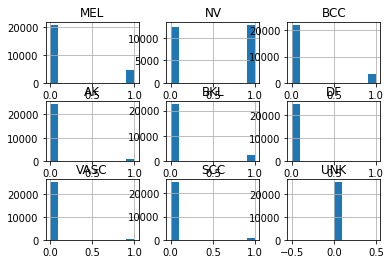

In [ ]:
train_target.hist()


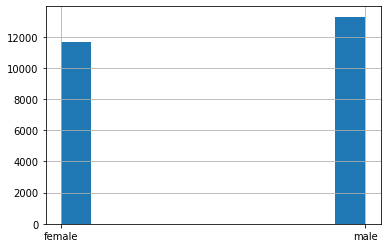

In [ ]:
train['sex'].hist()

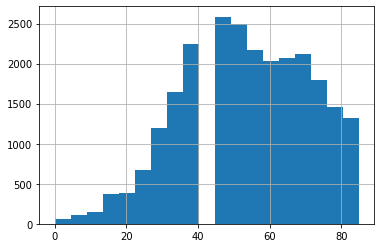

In [ ]:
train['age_approx'].hist(bins=len(train['age_approx'].unique()))

In [ ]:
train['age_approx'].value_counts()

45.0    2585
50.0    2489
40.0    2246
55.0    2170
70.0    2120
65.0    2075
60.0    2036
75.0    1796
35.0    1651
80.0    1459
85.0    1319
30.0    1199
25.0     677
20.0     388
15.0     375
10.0     142
5.0      113
0.0       54
Name: age_approx, dtype: int64

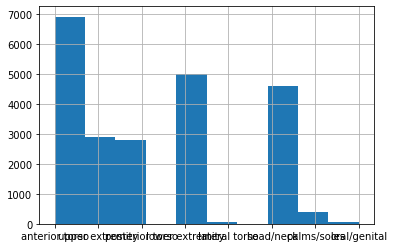

In [ ]:
train['anatom_site_general'].hist()

In [ ]:
train.shape, test.shape

((25331, 5), (8238, 4))

In [ ]:
from sklearn.model_selection import train_test_split

train_split, val_split = train_test_split(train, random_state=42, test_size=0.33, shuffle=True, stratify=train['target'])

train_split.shape, val_split.shape

((22194, 8), (10932, 8))

In [ ]:
((22194, 8), (10932, 8))
train_split.to_csv(f'{PATH}/train_split.csv', index=False)
val_split.to_csv(f'{PATH}/val_split.csv', index=False)

In [ ]:
_, subset = train_test_split(train_split, random_state=42, test_size=0.1, shuffle=True, stratify=train_split['target'])
subset.shape

(2220, 8)

In [ ]:
subset.to_csv(f'{PATH}/subset.csv', index=False)